In [1]:
import inference_gym.using_jax as gym
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from src.samplers import samplers
import seaborn as sns



In [2]:
from src.models import models
from src.models.standardgaussian import Gaussian

samples, metadata = samplers['nuts'](return_samples=True)(
        model=gym.targets.Banana(), 
        num_steps=1000,
        initial_position=jnp.ones(2), 
        key=jax.random.PRNGKey(0))


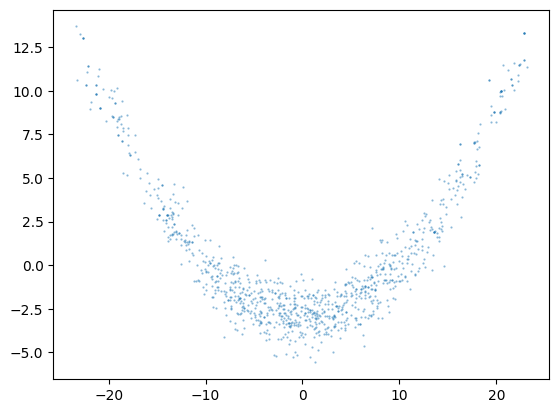

In [3]:
# scatter plot of samples
plt.scatter(samples[:,0], samples[:,1], alpha=0.5, s=0.3)

In [16]:
# load df from results
import itertools
import os
import pandas as pd
df = pd.concat([pd.read_csv(os.path.join('..', 'results', f'{sampler}_{model}.csv')) for sampler, model in itertools.product(samplers, models)], ignore_index=True)

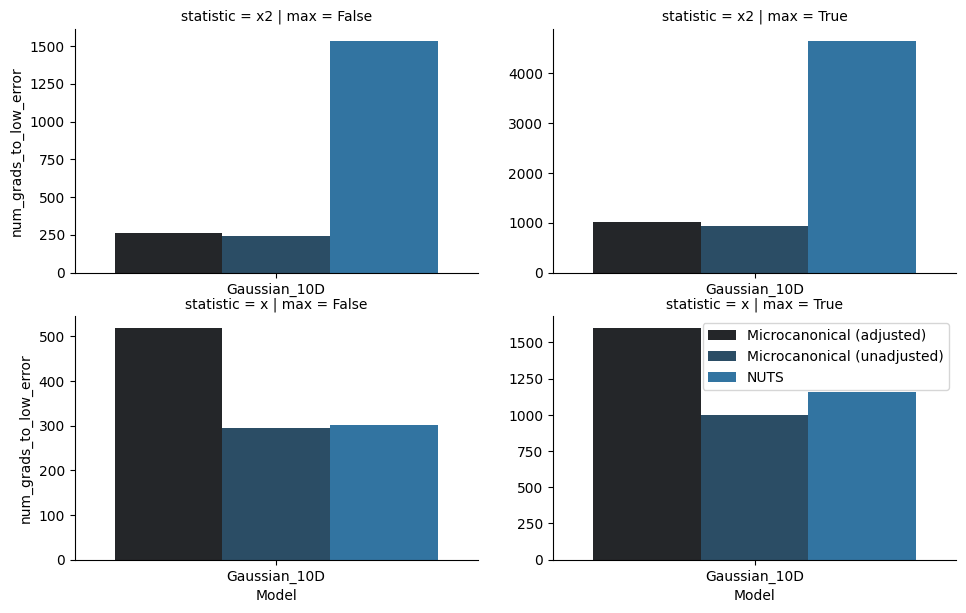

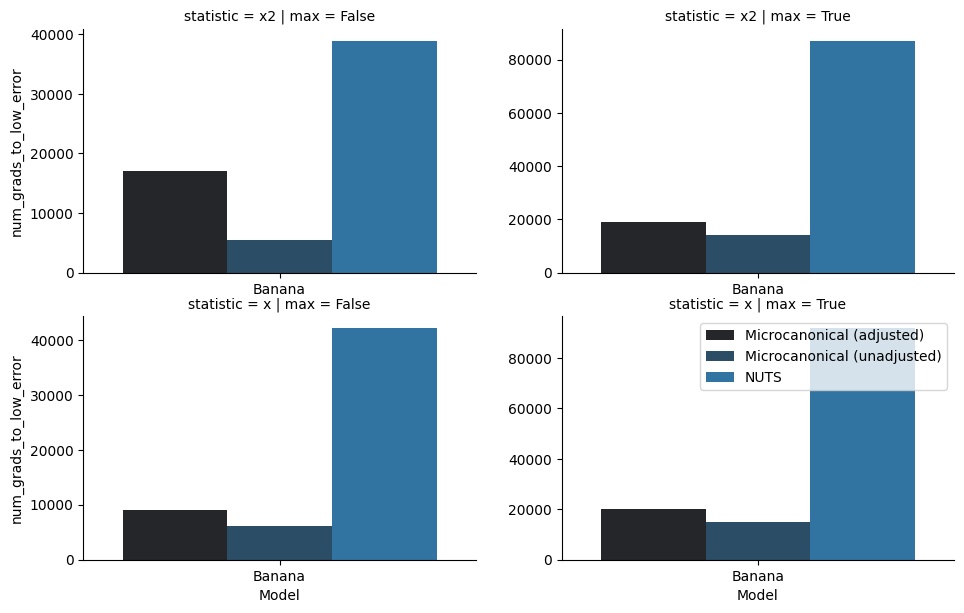

In [22]:
import numpy as np


def display_results(model_name,df, include_tuning=False):

  df["PrettyName"] = df["Sampler"].apply({"nuts": "NUTS", "unadjusted_microcanonical": "Microcanonical (unadjusted)", "adjusted_microcanonical": "Microcanonical (adjusted)"}.get)
  df["total_num_grads_to_low_error"] = df["num_grads_to_low_error"] + df["num_tuning_grads"]
  df = df[df["Model"] == model_name]

  g = sns.FacetGrid(df,
              col='max',
              row="statistic",
              sharex=False,
              sharey=False,
              height=4,
             )
  g = g.map(sns.barplot, 'Model',  'total_num_grads_to_low_error' if include_tuning else "num_grads_to_low_error", "PrettyName",  
            hue_order=np.unique(df["PrettyName"]), 
            order=np.unique(df["Model"]),
            # log_scale=True,
            palette='dark:#1f77b4'
  )
  plt.legend()
  # plt.yscale('log')

  plt.gcf().set_size_inches(10, 6)
  plt.show()

display_results("Gaussian_10D", df, include_tuning=False)
display_results("Banana", df, include_tuning=False)